# library imports<a href="#library-imports" class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    import numpy as np

# data read<a href="#data-read" class="anchor-link">¶</a>

In \[2\]:

    df=pd.read_csv('corona_tested_individuals.csv',low_memory=False)

In \[3\]:

    df.head

Out\[3\]:

    <bound method NDFrame.head of           test_date  cough  fever  sore_throat  shortness_of_breath  \
    0        2020-11-12      0      0            0                    0   
    1        2020-11-12      0      1            0                    0   
    2        2020-11-12      0      0            0                    0   
    3        2020-11-12      0      0            0                    0   
    4        2020-11-12      0      1            0                    0   
    ...             ...    ...    ...          ...                  ...   
    2742591  2020-03-11      0      0            0                    0   
    2742592  2020-03-11      0      0            0                    0   
    2742593  2020-03-11      0      0            0                    0   
    2742594  2020-03-11      0      0            0                    0   
    2742595  2020-03-11      0      1            0                    0   

             head_ache corona_result age_60_and_above  gender  \
    0                0      negative               No    male   
    1                0      negative               No    male   
    2                0      negative              Yes  female   
    3                0      negative               No    male   
    4                0      negative               No    male   
    ...            ...           ...              ...     ...   
    2742591          0      negative              NaN  female   
    2742592          0      negative              NaN  female   
    2742593          0         other              NaN    male   
    2742594          0      negative              NaN  female   
    2742595          0      negative              NaN    male   

                    test_indication  
    0                         Other  
    1                         Other  
    2                         Other  
    3                         Other  
    4        Contact with confirmed  
    ...                         ...  
    2742591                   Other  
    2742592                   Other  
    2742593                   Other  
    2742594                   Other  
    2742595                   Other  

    [2742596 rows x 10 columns]>

# view raw data<a href="#view-raw-data" class="anchor-link">¶</a>

In \[4\]:

    df.head()

Out\[4\]:

|     | test_date  | cough | fever | sore_throat | shortness_of_breath | head_ache | corona_result | age_60_and_above | gender | test_indication        |
|-----|------------|-------|-------|-------------|---------------------|-----------|---------------|------------------|--------|------------------------|
| 0   | 2020-11-12 | 0     | 0     | 0           | 0                   | 0         | negative      | No               | male   | Other                  |
| 1   | 2020-11-12 | 0     | 1     | 0           | 0                   | 0         | negative      | No               | male   | Other                  |
| 2   | 2020-11-12 | 0     | 0     | 0           | 0                   | 0         | negative      | Yes              | female | Other                  |
| 3   | 2020-11-12 | 0     | 0     | 0           | 0                   | 0         | negative      | No               | male   | Other                  |
| 4   | 2020-11-12 | 0     | 1     | 0           | 0                   | 0         | negative      | No               | male   | Contact with confirmed |

# data preprocessing<a href="#data-preprocessing" class="anchor-link">¶</a>

In \[5\]:

    df.shape

Out\[5\]:

    (2742596, 10)

In \[6\]:

    df=df.drop(['test_date'],axis=1)

### checking whether any value of dataset is null or not<a href="#checking-whether-any-value-of-dataset-is-null-or-not" class="anchor-link">¶</a>

In \[7\]:

    df.isna().sum()

Out\[7\]:

    cough                       0
    fever                       0
    sore_throat                 0
    shortness_of_breath         0
    head_ache                   0
    corona_result               0
    age_60_and_above       547644
    gender                  92886
    test_indication             0
    dtype: int64

### remove all null values<a href="#remove-all-null-values" class="anchor-link">¶</a>

In \[8\]:

    df=df.dropna()

### replacing value with binary digit<a href="#replacing-value-with-binary-digit" class="anchor-link">¶</a>

In \[9\]:

    df['gender'].replace({'male':0, 'female':1}, inplace=True)
    df.gender=df.gender.fillna(2)
    print(df)

             cough  fever  sore_throat  shortness_of_breath  head_ache  \
    0            0      0            0                    0          0   
    1            0      1            0                    0          0   
    2            0      0            0                    0          0   
    3            0      0            0                    0          0   
    4            0      1            0                    0          0   
    ...        ...    ...          ...                  ...        ...   
    2731639      1      1            1                    1          1   
    2731640      0      0            0                    0          0   
    2731643      1      0            0                    0          0   
    2731644      0      0            0                    0          0   
    2731647      0      0            0                    0          0   

            corona_result age_60_and_above  gender         test_indication  
    0            negative               No       0                   Other  
    1            negative               No       0                   Other  
    2            negative              Yes       1                   Other  
    3            negative               No       0                   Other  
    4            negative               No       0  Contact with confirmed  
    ...               ...              ...     ...                     ...  
    2731639      positive               No       1  Contact with confirmed  
    2731640      negative               No       1                   Other  
    2731643      negative               No       0  Contact with confirmed  
    2731644      negative               No       1                   Other  
    2731647      negative               No       1                   Other  

    [2186227 rows x 9 columns]

In \[10\]:

    df['age_60_and_above'].replace({'No':0, 'Yes':1}, inplace=True)
    df.age_60_and_above=df.age_60_and_above.fillna(2)
    print(df)

             cough  fever  sore_throat  shortness_of_breath  head_ache  \
    0            0      0            0                    0          0   
    1            0      1            0                    0          0   
    2            0      0            0                    0          0   
    3            0      0            0                    0          0   
    4            0      1            0                    0          0   
    ...        ...    ...          ...                  ...        ...   
    2731639      1      1            1                    1          1   
    2731640      0      0            0                    0          0   
    2731643      1      0            0                    0          0   
    2731644      0      0            0                    0          0   
    2731647      0      0            0                    0          0   

            corona_result  age_60_and_above  gender         test_indication  
    0            negative                 0       0                   Other  
    1            negative                 0       0                   Other  
    2            negative                 1       1                   Other  
    3            negative                 0       0                   Other  
    4            negative                 0       0  Contact with confirmed  
    ...               ...               ...     ...                     ...  
    2731639      positive                 0       1  Contact with confirmed  
    2731640      negative                 0       1                   Other  
    2731643      negative                 0       0  Contact with confirmed  
    2731644      negative                 0       1                   Other  
    2731647      negative                 0       1                   Other  

    [2186227 rows x 9 columns]

In \[11\]:

    df['test_indication'].replace({'Abroad':0, 'Contact with confirmed':1, 'Other':2}, inplace=True)
    print(df)

             cough  fever  sore_throat  shortness_of_breath  head_ache  \
    0            0      0            0                    0          0   
    1            0      1            0                    0          0   
    2            0      0            0                    0          0   
    3            0      0            0                    0          0   
    4            0      1            0                    0          0   
    ...        ...    ...          ...                  ...        ...   
    2731639      1      1            1                    1          1   
    2731640      0      0            0                    0          0   
    2731643      1      0            0                    0          0   
    2731644      0      0            0                    0          0   
    2731647      0      0            0                    0          0   

            corona_result  age_60_and_above  gender  test_indication  
    0            negative                 0       0                2  
    1            negative                 0       0                2  
    2            negative                 1       1                2  
    3            negative                 0       0                2  
    4            negative                 0       0                1  
    ...               ...               ...     ...              ...  
    2731639      positive                 0       1                1  
    2731640      negative                 0       1                2  
    2731643      negative                 0       0                1  
    2731644      negative                 0       1                2  
    2731647      negative                 0       1                2  

    [2186227 rows x 9 columns]

In \[12\]:

    x=df.drop(columns=['corona_result','test_indication'])
    y=df['test_indication']

In \[13\]:

    df.dtypes

Out\[13\]:

    cough                   int64
    fever                   int64
    sore_throat             int64
    shortness_of_breath     int64
    head_ache               int64
    corona_result          object
    age_60_and_above        int64
    gender                  int64
    test_indication         int64
    dtype: object

In \[14\]:

    df

Out\[14\]:

|         | cough | fever | sore_throat | shortness_of_breath | head_ache | corona_result | age_60_and_above | gender | test_indication |
|---------|-------|-------|-------------|---------------------|-----------|---------------|------------------|--------|-----------------|
| 0       | 0     | 0     | 0           | 0                   | 0         | negative      | 0                | 0      | 2               |
| 1       | 0     | 1     | 0           | 0                   | 0         | negative      | 0                | 0      | 2               |
| 2       | 0     | 0     | 0           | 0                   | 0         | negative      | 1                | 1      | 2               |
| 3       | 0     | 0     | 0           | 0                   | 0         | negative      | 0                | 0      | 2               |
| 4       | 0     | 1     | 0           | 0                   | 0         | negative      | 0                | 0      | 1               |
| ...     | ...   | ...   | ...         | ...                 | ...       | ...           | ...              | ...    | ...             |
| 2731639 | 1     | 1     | 1           | 1                   | 1         | positive      | 0                | 1      | 1               |
| 2731640 | 0     | 0     | 0           | 0                   | 0         | negative      | 0                | 1      | 2               |
| 2731643 | 1     | 0     | 0           | 0                   | 0         | negative      | 0                | 0      | 1               |
| 2731644 | 0     | 0     | 0           | 0                   | 0         | negative      | 0                | 1      | 2               |
| 2731647 | 0     | 0     | 0           | 0                   | 0         | negative      | 0                | 1      | 2               |

2186227 rows × 9 columns

# describe all data<a href="#describe-all-data" class="anchor-link">¶</a>

In \[15\]:

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Assuming 'df' is your DataFrame

    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Create a correlation matrix
    correlation_matrix = numeric_df.corr()

    # Plotting the correlation matrix
    f = plt.figure(figsize=(19, 15))
    plt.matshow(correlation_matrix, fignum=f.number)
    plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=19, rotation=45)
    plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=19)
    plt.title('Correlation Matrix', fontsize=26)
    dataplot = sns.heatmap(correlation_matrix, cmap='magma', annot=True)
    plt.show()

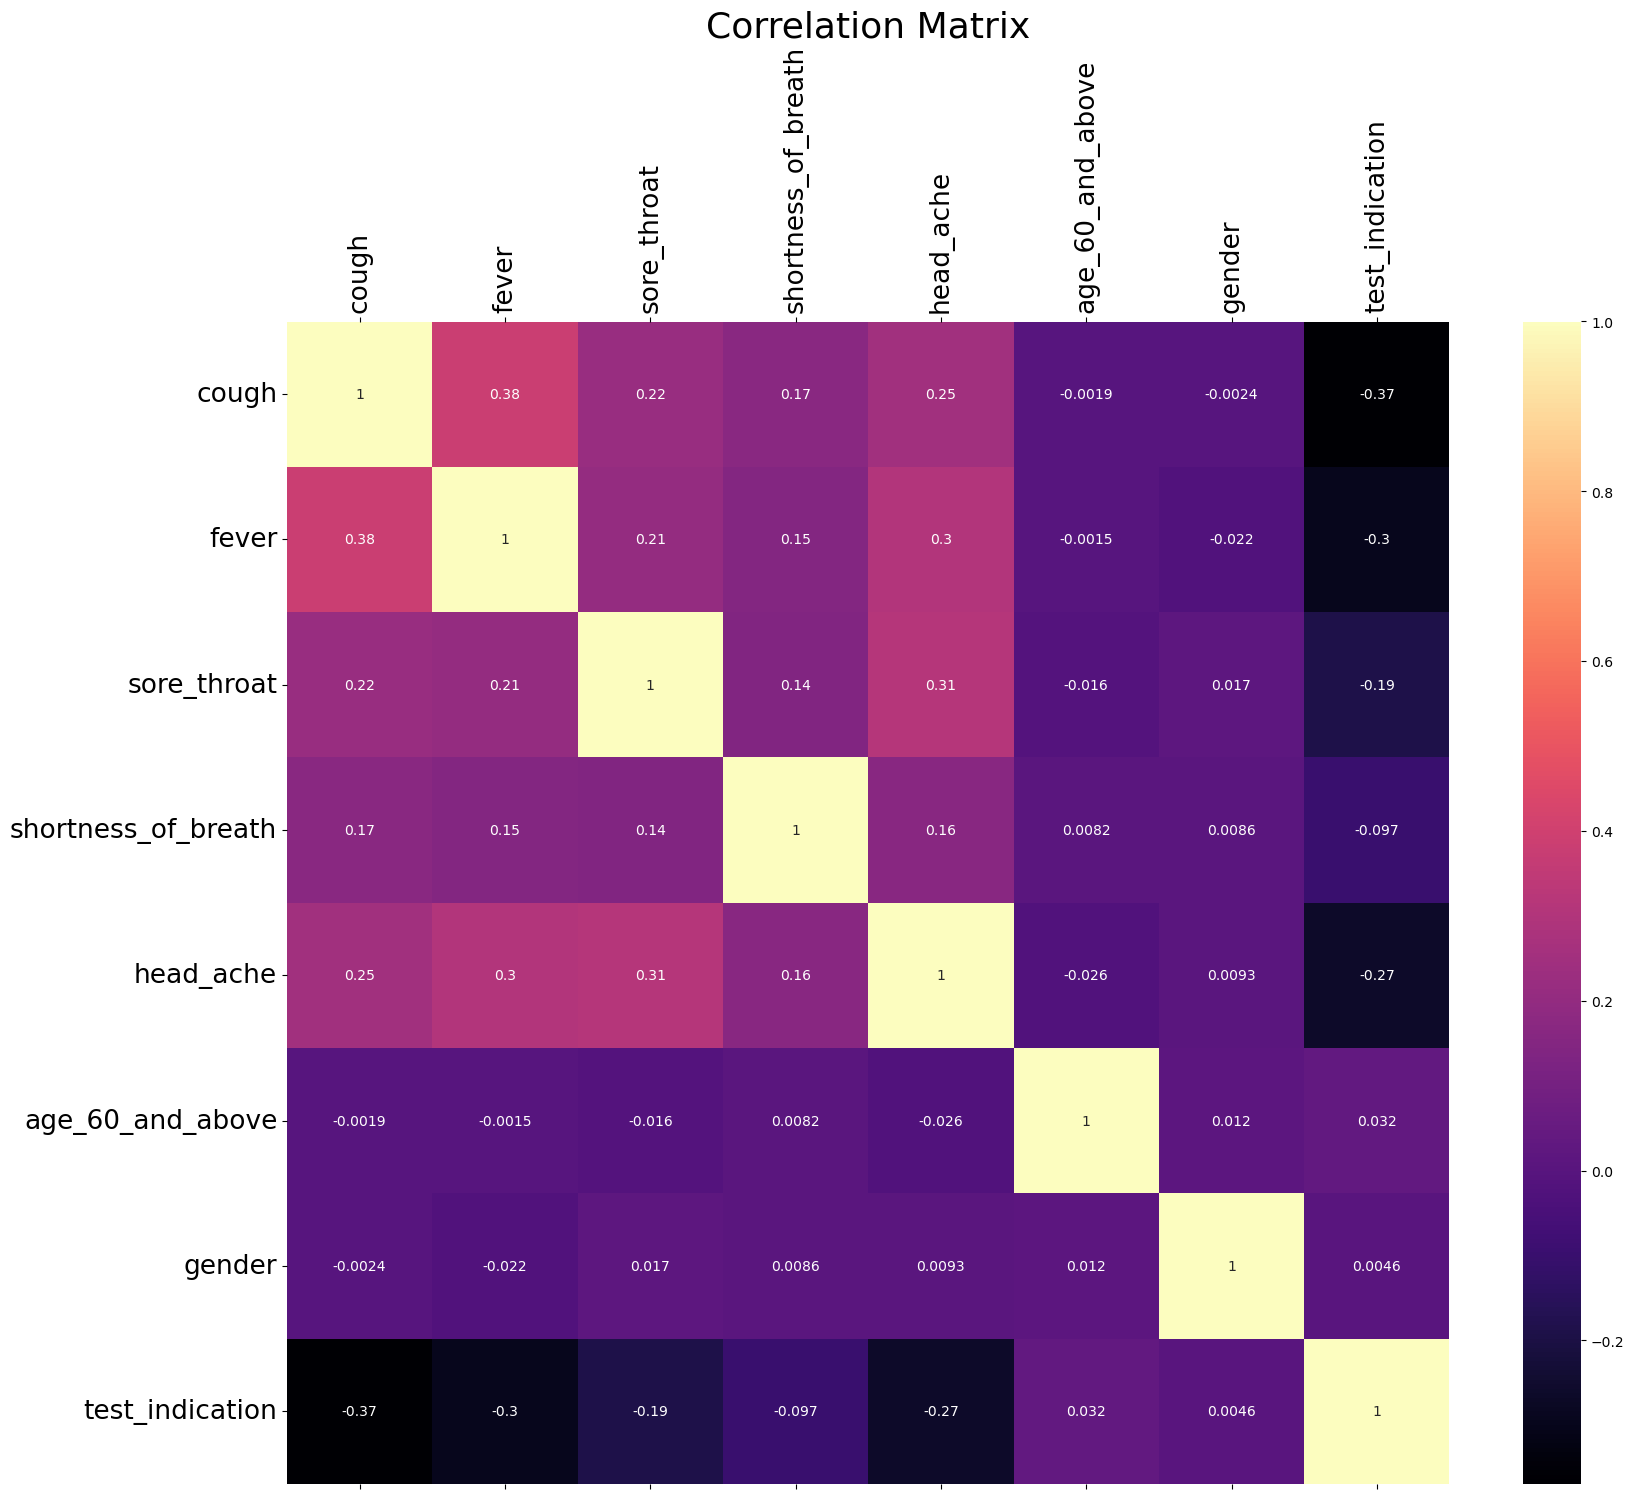

# statistics vision<a href="#statistics-vision" class="anchor-link">¶</a>

In \[16\]:

    rs = np.random.RandomState(0)
    df = pd.DataFrame(rs.rand(10, 10))
    corr = df.corr()
    corr.style.background_gradient(cmap='magma')

Out\[16\]:

|     | 0         | 1         | 2         | 3         | 4         | 5         | 6         | 7         | 8         | 9         |
|-----|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| 0   | 1.000000  | 0.347533  | 0.398948  | 0.455743  | 0.072914  | -0.233402 | -0.731222 | 0.477978  | -0.442621 | 0.015185  |
| 1   | 0.347533  | 1.000000  | -0.284056 | 0.571003  | -0.285483 | 0.382480  | -0.362842 | 0.642578  | 0.252556  | 0.190047  |
| 2   | 0.398948  | -0.284056 | 1.000000  | -0.523649 | 0.152937  | -0.139176 | -0.092895 | 0.016266  | -0.434016 | -0.383585 |
| 3   | 0.455743  | 0.571003  | -0.523649 | 1.000000  | -0.225343 | -0.227577 | -0.481548 | 0.473286  | 0.279258  | 0.446650  |
| 4   | 0.072914  | -0.285483 | 0.152937  | -0.225343 | 1.000000  | -0.104438 | -0.147477 | -0.523283 | -0.614603 | -0.189916 |
| 5   | -0.233402 | 0.382480  | -0.139176 | -0.227577 | -0.104438 | 1.000000  | -0.030252 | 0.417640  | 0.205851  | 0.095084  |
| 6   | -0.731222 | -0.362842 | -0.092895 | -0.481548 | -0.147477 | -0.030252 | 1.000000  | -0.494440 | 0.381407  | -0.353652 |
| 7   | 0.477978  | 0.642578  | 0.016266  | 0.473286  | -0.523283 | 0.417640  | -0.494440 | 1.000000  | 0.375873  | 0.417863  |
| 8   | -0.442621 | 0.252556  | -0.434016 | 0.279258  | -0.614603 | 0.205851  | 0.381407  | 0.375873  | 1.000000  | 0.150421  |
| 9   | 0.015185  | 0.190047  | -0.383585 | 0.446650  | -0.189916 | 0.095084  | -0.353652 | 0.417863  | 0.150421  | 1.000000  |

# ready to split<a href="#ready-to-split" class="anchor-link">¶</a>

In \[17\]:

    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

# Algorithm<a href="#Algorithm" class="anchor-link">¶</a>

In \[18\]:

    from sklearn.ensemble import GradientBoostingClassifier

    model = GradientBoostingClassifier()
    model.fit(xtrain,ytrain)
    model.score(xtest,ytest)*100

Out\[18\]:

    92.78514459442358

In \[19\]:

    ypred = model.predict(xtest)
    ypred

Out\[19\]:

    array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

# Confusion Metrics<a href="#Confusion-Metrics" class="anchor-link">¶</a>

In \[20\]:

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

    cm=confusion_matrix(ytest,ypred)
    print(accuracy_score(ytest,ypred))

    0.9278514459442359

In \[21\]:

    import seaborn as sns
    import matplotlib.pyplot as plt     

    ax= plt.subplot()
    sns.heatmap(cm,annot=True,fmt='d',ax=ax)

    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['other', 'positive','negative']);
    ax.yaxis.set_ticklabels(['other', 'nagative','positive']);

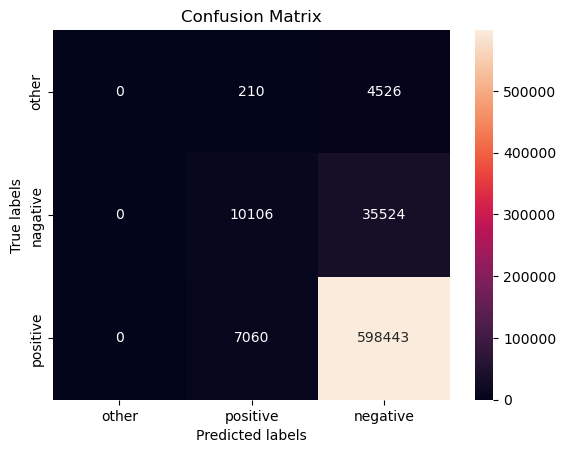

In \[22\]:

    from sklearn.metrics import classification_report

    cr=classification_report(ytest,ypred,zero_division=0)
    print(cr)

                  precision    recall  f1-score   support

               0       0.00      0.00      0.00      4736
               1       0.58      0.22      0.32     45630
               2       0.94      0.99      0.96    605503

        accuracy                           0.93    655869
       macro avg       0.51      0.40      0.43    655869
    weighted avg       0.91      0.93      0.91    655869

In \[24\]:

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score

    # Assuming ytest and ypred are your actual and predicted labels
    ytest = ['fever']  # Your actual labels
    ypred = ['head_ache']  # Your predicted labels

    # Calculate accuracy score
    acc = accuracy_score(ytest, ypred)

    # Set up color palette
    col = sns.color_palette('ch:s=.25,rot=-.25')

    # Plot pie chart
    plt.xlabel('GBC')
    plt.pie([acc, 1-acc], autopct='%2.2f%%', colors=col, startangle=90, shadow=True)
    plt.show()

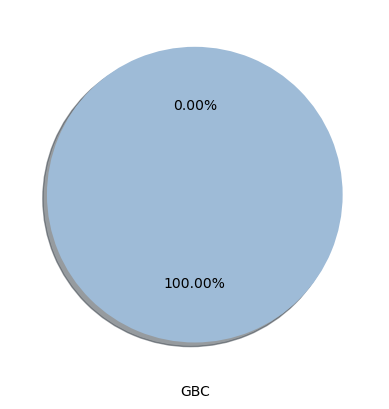

In \[ \]:

     

In \[ \]:

     

In \[ \]: